# Randomness and Reproducibility

As we learned in the beginning of this week, the concept of randomness is a cornerstone for statistical inference when drawing samples from larger populations.

In this tutorial, we are going to cover the following:

* Randomness and its uses in python.

* Utilizing python seeds to reproduce analysis.

* Generating random variables from a probability distribution.

* Random sampling from a population.


## What is Randomness?

In the beginning of this week's lectures, we touched on the significance of randomness when it comes to performing statistical inference on population samples.  If we have complete randomness, our estimates of means, proportions, and totals are ubiased.  This means our estimates are equal to the population values on average. 

In Python, we refer to randomness as the ability to generate data, strings, or, more generally, numbers at random.

However, when conducting analysis it is important to consider reproducibility.  If we are creating random data, how can we enable reproducible analysis?

We do this by utilizing pseudo-random number generators (PRNGs).  PRNGs start with a random number, known as the seed, and then use an algorithm to generate a psuedo-random sequence based on it.

This means that we can replicate the output of a random number generator in python simply by knowing which seed was used.

We can showcase this by using the functions in the python library *__random__*.

### Setting a Seed and Generating Random Numbers

In [1]:
import random

In [2]:
random.seed(1234)

random.random()

0.9664535356921388

In [3]:
random.seed(1234)

random.random()

0.9664535356921388

### Random Numbers from Real-Valued Distributions 
#### Uniform

In [4]:
# generate random numbers of uniform distribution between 25 and 50
# uniform distribution is each number has the same opportunity of being selected
random.uniform(25,50)

36.01831497938382

In [5]:
# generate 1000 number with (0,1), which is uniform distribution
unifNumbers = [random.uniform(0,1) for _ in range(1000)]

In [ ]:
unifNumbers # this will give 1000 numbers

In [12]:
unifNumbers[0:5] # check the first five numbers

[0.007491470058587191,
 0.9109759624491242,
 0.939268997363764,
 0.5822275730589491,
 0.6715634814879851]

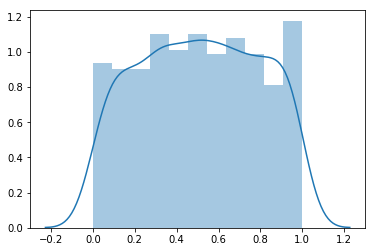

In [15]:
# check the distribution of generated numbers
import seaborn as sns
sns.distplot(unifNumbers)

#### Normal

In [9]:
mu = 0 # mean

sigma = 1 # standard deviation

random.normalvariate(mu, sigma)

-0.5120344186633362

In [10]:
mu = 5

sigma = 2

random.normalvariate(mu, sigma)

4.772935466104815

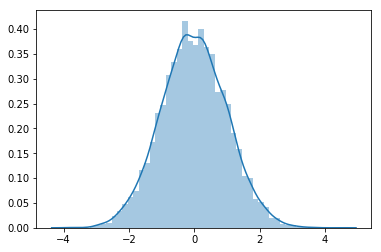

In [19]:
mu = 0

sigma = 1

b = [random.normalvariate(mu, sigma) for _ in range(10000)]

sns.distplot(b)

### Random Sampling from a Population

From lecture, we know that **Simple Random Sampling (SRS)** has the following properties:

* Start with known list of *N* population units, and randomly select *n* units from the list
* Every unit has **equal probability of selection = _n/N_**
* All possible samples of size *n* are equaly likely
* Estimates of means, proportions, and totals based on SRS are **UNBIASED** (meaning they are equal to the population values on average)

In [20]:
import random
import numpy as np

In [21]:
mu = 0
    
sigma = 1

Population = [random.normalvariate(mu, sigma) for _ in range(10000)]

In [22]:
SampleA = random.sample(Population, 500) # sample 500 numbers from population
SampleB = random.sample(Population, 500)

In [23]:
np.mean(SampleA)

0.04952154092824237

In [24]:
np.std(SampleA)

1.0375796959039438

In [25]:
np.mean(SampleB)

-0.038992786708991284

In [26]:
np.std(SampleB)

1.012597762926871

In [27]:
means = [np.mean(random.sample(Population, 1000)) for _ in range(100)]

np.mean(means)

-0.00982220957743052

In [31]:
standarddevs = [np.std(random.sample(Population,1000)) for _ in range(100)]
np.mean(standarddevs)

1.0031167243623869